In [10]:
import numpy as np

# dataset of minist
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
# Prepare data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Training data size: ', X_train.shape[0])
print('Test data size: ', X_test.shape[0])

n_sample, image_row, image_col = X_train.shape
print('Image size: {}*{}'.format(image_row, image_col))

X_train = X_train.reshape(X_train.shape[0], image_row, image_col, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], image_row, image_col, 1).astype('float32')
input_shape = (image_row, image_col, 1)

nb_classes = 10

# one hot representation
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

Training data size:  60000
Test data size:  10000
Image size: 28*28


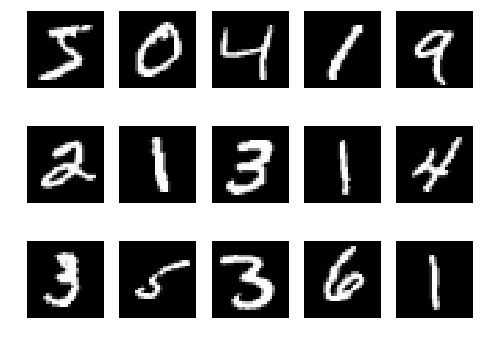

In [28]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i].reshape(28,28), cmap='gray')
    axi.axis('off')
plt.show()

In [3]:
# Define the CNN model

# feature map size
fm_size = 32
# Pooling
pool_size = (2, 2)
# Kernel
kernel_size = (3,3)

model = Sequential()
# first conv layer
model.add(Conv2D(fm_size, kernel_size, padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

# second conv layer
model.add(Conv2D(fm_size, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

# flatten
model.add(Flatten())

# last dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [7]:
# Compilation
# optimizer adadelta = 0.9463, sgd = 0.9461

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Trainning
batch_size = 100
epochs = 1

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 46s 762us/step - loss: 0.3493 - acc: 0.8997 - val_loss: 0.1220 - val_acc: 0.9641


In [9]:
# # Evaluation
# score = model.evaluate(X_test, y_test, verbose=0)
# print("Test Metrics:{}".format(score))

Test Metrics:[0.12201269393423572, 0.9641]
